<center>
    <font size="5"> Zaawansowane Metody Uczenia Maszynowego i Głębokiegio<br/>
        <small><em>Studia stacjonarne II stopnia 2025/2026</em><br/>Kierunek: Informatyka<br>Specjalność: Systemy inteligentne i rozszerzona rzeczywistość</small>
    </font>
</center>
<br>



# Laboratorium nr 8: Sieć Hopfielda

### Import bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
print('Numpy version:', np.__version__)
print('Tensorflow version:', tf.__version__)

2025-11-28 23:38:23.252111: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-28 23:38:23.252379: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-28 23:38:23.283145: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-28 23:38:24.401647: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

Numpy version: 2.2.6
Tensorflow version: 2.20.0


## Sieć Hopfielda
Zaimplementuj architekturę sieci Hopfielda wraz z algorytmami uczenia: Hebb, Pseudoinwersja.

- Budowa i działanie sieci: SN_Hopfield.pdf
- Algorytm Hebba i Pseudoinversja: Matusik.pdf

In [2]:
class Hopfield():
    def __init__(self, n):
        # inicjalizacja wag
        self.W = np.zeros((n, n))
        self.n = n

    def predict(self, x, maxiter=10000):
        # predict
        self.iter = 0
        y = x.copy()
        for i in range(maxiter):
            self.iter += 1
            for j in range(self.n):
                y[j] = np.sign(np.dot(x, self.W[j]))
                if y[j] == 0:
                    y[j] = x[j]
            if np.all(x==y):
                break 
            x = y.copy()
        return y           

    def train_heb(self, X):
        # adaptacja wag metodą hebba
        for x in X:
            self.W += np.outer(x,x)
        self.W = self.W / self.n
        self.W[range(self.n), range(self.n)] = 0.0

    def train_pseudo_inv(self, X):
        # adaptacja wag metodą pseudo inwersji
        for x in X:
            x = x.reshape((-1, 1))
            self.W += (((self.W @ x)-x) @ ((self.W @ x)-x).T)/((x.T @ x)-(x.T @ (self.W @ x)))
            self.W[range(self.n), range(self.n)] = 0.0



## Dane uczące (wzorce).

In [3]:
# cyfry 5x7 pikseli
pattern_data = {"0": [1,  1,  1,  1, 1,
                      1, -1, -1, -1, 1,
                      1, -1, -1, -1, 1,
                      1, -1, -1, -1, 1,
                      1, -1, -1, -1, 1,
                      1, -1, -1, -1, 1,
                      1,  1,  1,  1, 1],
                "1": [-1, -1, -1, -1, 1,
                      -1, -1, -1,  1, 1,
                      -1, -1,  1, -1, 1,
                      -1, -1, -1, -1, 1,
                      -1, -1, -1, -1, 1,
                      -1, -1, -1, -1, 1,
                      -1, -1, -1, -1, 1],
                "2": [ 1,  1,  1,  1,  1,
                      -1, -1, -1, -1,  1,
                      -1, -1, -1, -1,  1,
                       1,  1,  1,  1,  1,
                       1, -1, -1, -1, -1,
                       1, -1, -1, -1, -1,
                       1,  1,  1, 1, 1],
                "3": [ 1,  1,  1,  1, 1,
                      -1, -1, -1, -1, 1,
                      -1, -1, -1, -1, 1,
                      -1,  1,  1,  1, 1,
                      -1, -1, -1, -1, 1,
                      -1, -1, -1, -1, 1,
                       1,  1,  1,  1, 1],
                "4": [ 1, -1, -1, -1, -1,
                       1, -1, -1, -1, -1,
                       1, -1, -1,  1, -1,
                       1,  1,  1,  1,  1,
                      -1, -1, -1,  1, -1,
                      -1, -1, -1,  1, -1,
                      -1, -1, -1,  1, -1],
                "5": [ 1,  1,  1,  1,  1,
                       1, -1, -1, -1, -1,
                       1, -1, -1, -1, -1,
                       1,  1,  1,  1,  1,
                      -1, -1, -1, -1,  1,
                      -1, -1, -1, -1,  1,
                       1,  1,  1,  1,  1],
                "6": [1,  1,  1,  1,  1,
                      1, -1, -1, -1, -1,
                      1, -1, -1, -1, -1,
                      1,  1,  1,  1,  1,
                      1, -1, -1, -1,  1,
                      1, -1, -1, -1,  1,
                      1,  1,  1,  1,  1],
                "7": [ 1,  1,  1,  1,  1,
                      -1, -1, -1, -1,  1,
                      -1, -1, -1,  1, -1,
                      -1, -1,  1, -1, -1,
                      -1,  1, -1, -1, -1,
                       1, -1, -1, -1, -1,
                       1, -1, -1, -1, -1],
                "8": [1,  1,  1,  1, 1,
                      1, -1, -1, -1, 1,
                      1, -1, -1, -1, 1,
                      1,  1,  1,  1, 1,
                      1, -1, -1, -1, 1,
                      1, -1, -1, -1, 1,
                      1,  1,  1,  1, 1],
                "9": [ 1,  1,  1,  1, 1,
                       1, -1, -1, -1, 1,
                       1, -1, -1, -1, 1,
                       1,  1,  1,  1, 1,
                      -1, -1, -1, -1, 1,
                      -1, -1, -1, -1, 1,
                       1,  1,  1,  1, 1]
                }

In [4]:
def plot_images(images, no_r=2, no_c=5, figsize=(4,4)):
    fig = plt.figure(figsize=figsize)
    images = np.array(images).reshape(-1, 7, 5)
    for i in range(no_r):
        for j in range(no_c):
            ax = fig.add_subplot(no_r, no_c, no_c * i + (j + 1))
            ax.matshow(images[no_c * i + j], cmap="gray")
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

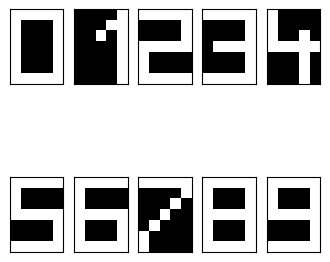

In [5]:
train_data = [np.array(d) for d in pattern_data.values()]
plot_images(train_data, no_r=2, no_c=5)

## Trenowanie
Utwórz instancje sieci Hipfielda i ją wytrenuj

In [6]:
hop = Hopfield(7*5)

In [7]:
#wagi przed trenowaniem
hop.W

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(35, 35))

In [8]:
train_data2 = np.array(train_data)

hop.train_pseudo_inv(train_data2)
#hop.train_heb(train_data2)

# wagi po trenowaniu
hop.W

array([[ 0.        ,  0.06935531,  0.06935531, ...,  0.02080455,
         0.10683706, -0.07594232],
       [ 0.06935531,  0.        ,  0.15539316, ...,  0.09360061,
         0.00728933,  0.0124382 ],
       [ 0.06935531,  0.15539316,  0.        , ...,  0.09360061,
         0.00728933,  0.0124382 ],
       ...,
       [ 0.02080455,  0.09360061,  0.09360061, ...,  0.        ,
         0.1050495 ,  0.09636074],
       [ 0.10683706,  0.00728933,  0.00728933, ...,  0.1050495 ,
         0.        ,  0.00839652],
       [-0.07594232,  0.0124382 ,  0.0124382 , ...,  0.09636074,
         0.00839652,  0.        ]], shape=(35, 35))

## Testowanie
Przygotuj przykłady testowe (np. takie jak w pdf'ie) i zaprezentuj wyniki.

In [9]:
test = np.array([[1,  1,  1,  1, 1,
                  1,  1, -1,  1, 1,
                  1, -1, -1, -1, 1,
                  1, -1, -1, -1, 1,
                  1, -1, -1, -1, 1,
                  1,  1, -1,  1, 1,
                  1,  1,  1,  1, 1]])

([], [])

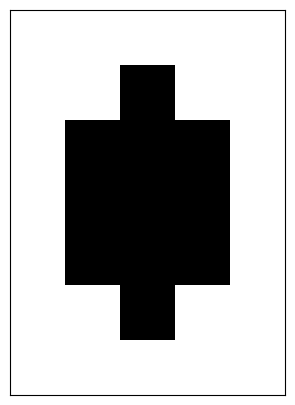

In [10]:
fig = plt.figure(figsize=(4,5))
ax = fig.add_subplot(1, 1, 1)
ax.matshow(test[0].reshape(7, 5), cmap="gray")
plt.xticks(np.array([]))
plt.yticks(np.array([]))

In [11]:
y = hop.predict(test[0])
y

array([ 1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
       -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,
        1])

([], [])

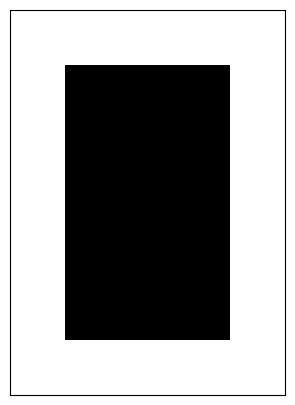

In [12]:
fig = plt.figure(figsize=(4,5))
ax = fig.add_subplot(1, 1, 1)
ax.matshow(y.reshape(7, 5), cmap="gray")
plt.xticks(np.array([]))
plt.yticks(np.array([]))

## Odszumianie danych
Przygotuje kod zaszumiający wzorce uczące, mutacja piksela z ustalonym prawdopodobieństwem. Przeprowadź eksperymenty pokazujące zdolność sieci Hopfielda od odszumiania danych.

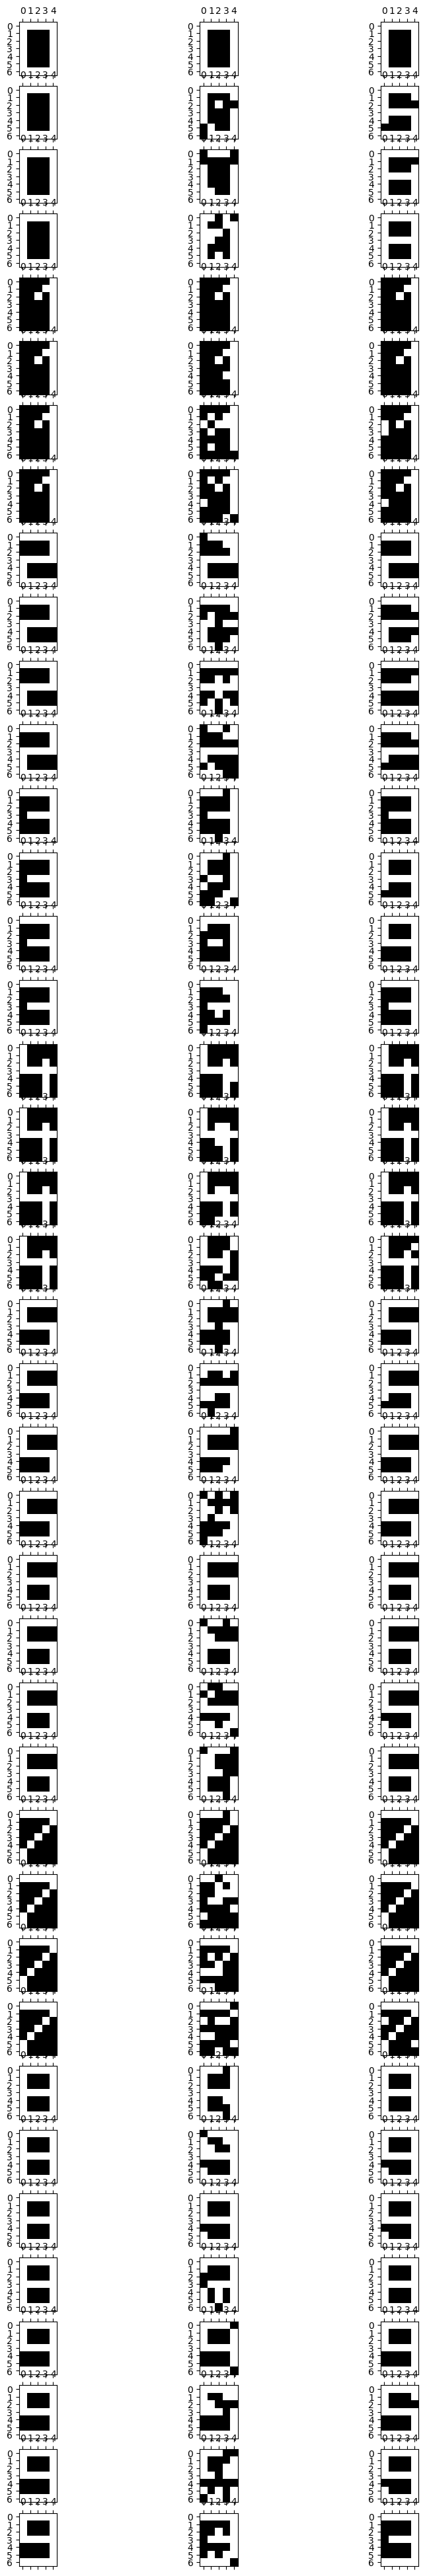

In [13]:
fig, axes =plt.subplots(40,3, figsize=(10,50))
for i,x in enumerate(train_data2):
    for i2,p in enumerate([5,10,15,20]):
        x2=x.copy()
        for j in range(len(x2)):
            if np.random.random()<(p/100):
                x2[j]*=-1

        y=hop.predict(x2)


        axes[i*4+i2][0].matshow(x.reshape((7,5)),cmap="gray")
        axes[i*4+i2][1].matshow(x2.reshape((7,5)),cmap="gray")
        axes[i*4+i2][2].matshow(y.reshape((7,5)),cmap="gray")

### Odtwarzenie obrazu z fragmentu
Przygotuj obraz, wylicz wagi i sprawdz czy sieć jest w stanie go odtworzyć z fragmentu.

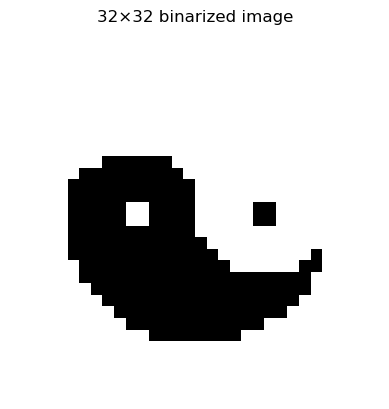

In [14]:
import imageio.v3 as lio
from PIL import Image

im = lio.imread("image.jpeg", mode="L") 

im = Image.fromarray(im)

im = im.resize((32, 32), Image.BILINEAR)

im = np.array(im)

im = np.where(im > 128, 1, -1)

flat = im.flatten()

plt.imshow(im, cmap="gray")
plt.title("32×32 binarized image")
plt.axis("off")
plt.show()


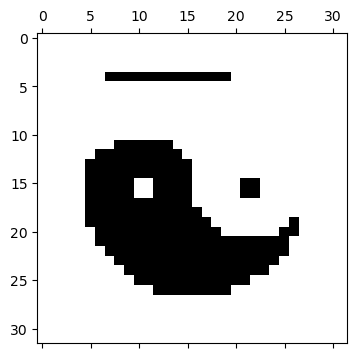

In [15]:




im2=im.copy()
im2[4:5,7:20]=-1
fig=plt.figure(figsize=(4,5))
ax=fig.add_subplot(1,1,1)
ax.matshow(im2, cmap="gray")


In [16]:
hop=Hopfield(im.size)
hop.train_pseudo_inv([im.flatten()])

In [17]:
im3=hop.predict(im2.flatten())

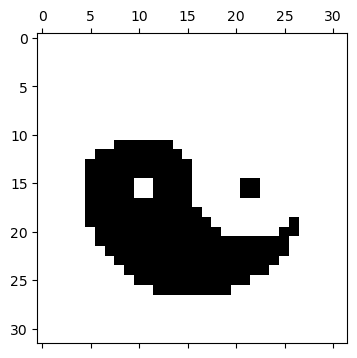

In [18]:
im3 = im3.reshape((32, 32))
fig=plt.figure(figsize=(4,5))
ax=fig.add_subplot(1,1,1)
ax.matshow(im3, cmap="gray")